# Semantic Spotter Project
### Submitted By Milind Awade - ML-C67

In [1]:
# Install the required libraries
%pip install PyPDF 

%pip install langchain openai langchain-community 

%pip install chromadb sentence-transformers tf-keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import the necessary libraies
import os
import openai

###
from langchain_openai import ChatOpenAI, OpenAI
from langchain_community.document_loaders import PyPDFDirectoryLoader
from langchain_community.cross_encoders import HuggingFaceCrossEncoder
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain.embeddings import OpenAIEmbeddings, CacheBackedEmbeddings
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain.storage import InMemoryStore
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CrossEncoderReranker
from langchain import hub
os.environ["ANONYMIZED_TELEMETRY"] = "False"

import warnings

warnings.filterwarnings("ignore")

# **LangChain**

The LangChain framework revolves around the following building blocks:
* Model I/O: Interface with language models (LLMs & Chat Models, Prompts, Output Parsers)
* Retrieval: Interface with application-specific data (Document loaders, Document transformers, Text embedding models, Vector stores, Retrievers)
* Chains: Construct sequences/chains of LLM calls
* Memory: Persist application state between runs of a chain
* Agents: Let chains choose which tools to use given high-level directives
* Callbacks: Log and stream intermediate steps of any chain
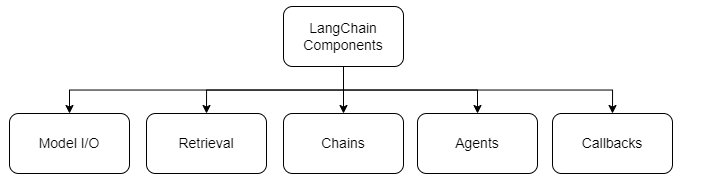

In [5]:
folder_path = './'
with open(folder_path + "openai_key.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines())

# Model I/O


LangChain's Model I/O component provides support to interface with the LLM and generate responses.
The Model I/O consists of:
* **Language Models**: Make calls to language models through common interfaces
* **Prompts**: Templatize, dynamically select, and manage model inputs
* **Output Parsers**: Extract information from model outputs

The general flow of Model I/O in LangChain is illustrated in the image below 

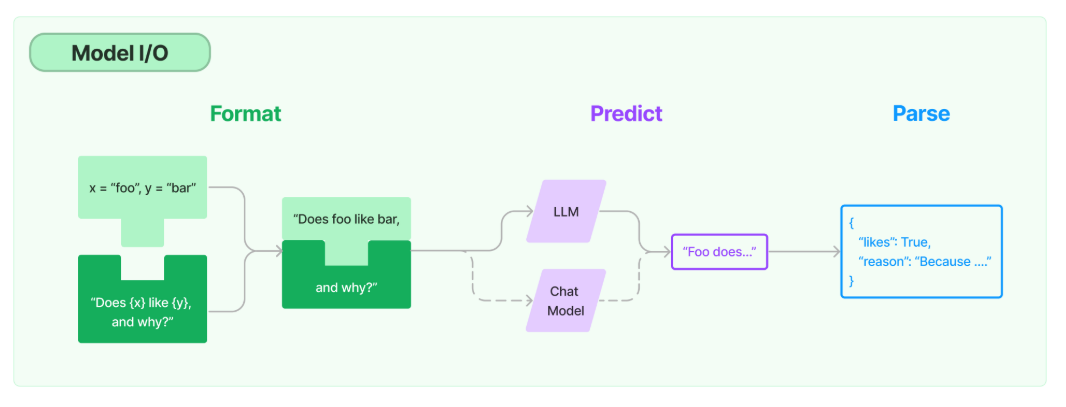

## Model


LangChain provides an easy out-of-the box support to work with LLMs. LangChain provides interfaces and integrations for two classes of LLM models
*   **LLMs**: Models that take a text string as input and return a text string
*   **Chat models**: Models that are backed by a language model but take a list of Chat Messages as input and return a Chat Message.

LLMs and chat models are subtly but importantly different. LLMs in LangChain refer to pure `text completion models` - where a string prompt is taken as the input and the LLM outputs a string.

Chat Models are LLMs that have been tuned specifically for having turn-based conversations such as ChatGPT. Instead of a single string, they take a list of chat messages as input. Usually these models have labelled messages such as "System", "Human" and provides a AI chat message ("AI"/ "Output Response") as the output.



###  LLMs


The `LLM` class of LangChain is designed to provide a standard interface for all the major LLM provides such as OpenAI, Cohere, Hugging Face, etc.
LangChain provided a standard interface for interacting with many different LLMs to perform  standard text completion tasks.

This, however, has been deprecated and no longer is supported by LangChain. The text completion model is now categorised as `legacy` by OpenAI hence for the remainder of the course, we will work with OpenAI's chat model.



###  **[Chat Model](https://python.langchain.com/docs/modules/model_io/models/chat/)**

Chat models are a variation on language models. While chat models use language models under the hood, the interface they use is a bit different. Rather than using a "text in, text out" API, they use an interface where "chat messages" are the inputs and outputs.


# Data Connections and Retrieval

In addition to making API calls easier, LangChain also provides various methods to work with external documents efficiently.

Many LLM applications require user-specific data that is not part of the model's training set. The primary way of accomplishing this is through Retrieval Augmented Generation (RAG). In this process, external data is retrieved and then passed to the LLM when doing the generation step.

LangChain provides all the building blocks for RAG applications - from simple to complex. This section of the documentation covers everything related to the retrieval step - e.g. the fetching of the data. Although this sounds simple, it can be subtly complex. This encompasses several key modules.

The following methods provided by LangChain help process documents efficiently:
* Document Loaders
* Text Splitters
* Vector Stores
* Retrievers
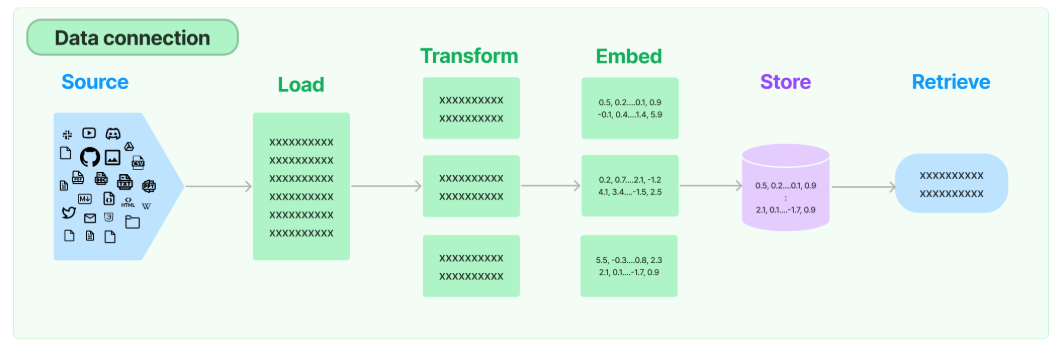


## **Document Loaders**


Document loaders provide an easy method to import data from different sources or formats as a DOcument, which contains the text content and the associated metadata.

Document Loaders load documents from different sources like HTML, PDF, text, etc., from various locations like cloud storage buckets and public websites. LangChain provides over 100 different document loaders as well as integrations with other major providers in the space, like AirByte and Unstructured. Refer to the official documentation for the complete list of supported [document loaders](https://api.python.langchain.com/en/latest/community/document_loaders.html) in the API reference and the [official documentation](https://python.langchain.com/docs/integrations/document_loaders).

It should be noted that some document loaders require the associated libraries to be installed.


In [7]:
document_folder_path = './documents/'
pdf_directory_loader = PyPDFDirectoryLoader(document_folder_path)

documents = pdf_directory_loader.load()
print(f"Number of documents: {len(documents)}")

Number of documents: 217


In [8]:
# print details like the source and page number for each docucment
for doc in documents:
    print(f"Source: {doc.metadata['source']}")
    print(f"Page Number: {doc.metadata['page']}")

Source: documents\HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
Page Number: 0
Source: documents\HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
Page Number: 1
Source: documents\HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
Page Number: 2
Source: documents\HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
Page Number: 3
Source: documents\HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
Page Number: 4
Source: documents\HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
Page Number: 5
Source: documents\HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
Page Number: 6
Source: documents\HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
Page Number: 7
Source: documents\HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
Page Number: 8
Source: documents\HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf
Page Number: 9
Source: documents\HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-

## **Document Transformers / Text Splitters**
Often times your document is too long (like a book) for your LLM. You need to split it up into chunks. Text splitters help with this.

There are many ways you could split your text into chunks, experiment with [different ones](https://python.langchain.com/docs/concepts/text_splitters/#approaches) to see which is best for you.

LangChain offers different text splitters for splitting the data such as:
* **Split by Character**
* **Recursive Splitter**
* **Token Splitter**

**Split by Character** - This is the simplest method. This splits based on characters (by default "\n\n") and measure chunk length by number of characters.
* How the text is split: by single character.
* How the chunk size is measured: by number of characters.

**Recursive Text Splitter** - This text splitter is the recommended one for generic text. It is parameterized by a list of characters. It tries to split on them in order until the chunks are small enough. The default list is ["\n\n", "\n", " ", ""]. This has the effect of trying to keep all paragraphs (and then sentences, and then words) together as long as possible, as those would generically seem to be the strongest semantically related pieces of text.
* How the text is split: by list of characters.
* How the chunk size is measured: by number of characters.

**Split by tokens** - Language models have a token limit. You should not exceed the token limit. When you split your text into chunks it is therefore a good idea to count the number of tokens. There are many tokenizers. When you count tokens in your text you should use the same tokenizer as used in the language model.

In [9]:
# Initialize the RecursiveCharacterTextSplitter (customize chunk size and overlap as needed)
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

splits = text_splitter.split_documents(documents)
print(splits[2])

page_content='option to return the Policy to us for cancellation stating the reasons thereof, within 15 days from the date of 
receipt of the Policy. On receipt of your letter along with the original Policy (original Policy Document is not 
required for policies in dematerialised form), we shall arrange to refund the Premium paid by you, subject to 
deduction of the proportionate risk Premium for the period of cover and the expenses incurred by us for medical 
examination (if any) and stamp duty charges. >> 
 
Contacting us: 
The address for correspondence is specified below. To enable us to serve you better, you are requested to quote 
your Policy number in all future correspondence. In case you are keen to know more about our products and 
services, we would request you to talk to our Certified Financial Consultant (Insurance Agent) who has advised 
you while taking this Policy. The details of your Certified Financial Consultant including contact details are 
listed below.' metadata=

## Text Embedding Models

The Embeddings class is a class designed for interfacing with text embedding models. LangChain provides support for most of the embedding model providers (OpenAI, Cohere) including sentence transformers library from Hugging Face.

Embeddings create a vector representation of a piece of text and supports all the operations such as similarity search, text comparison, sentiment analysis etc.

The base Embeddings class in LangChain provides two methods: one for embedding documents and one for embedding a query.

The first method takes as input multiple texts, while the second method returns the embedding representation for a single text.


In [10]:
# Import the OpenAI Embeddings class from LangChain
embeddings_model = OpenAIEmbeddings(api_key=openai.api_key)

In [11]:
# doing a sample embedding of a random chunk, to check size
embeddings = embeddings_model.embed_documents([splits[0].page_content])
print("No. of embeddings =", len(embeddings))
print("Length of embeddings =", len(embeddings[0]))

No. of embeddings = 1
Length of embeddings = 1536


## Vector Stores

One of the most common ways to store and search over unstructured data is to embed it and store the resulting embedding vectors, and then at query time to embed the unstructured query and retrieve the embedding vectors that are 'most similar' to the embedded query. A vector store takes care of storing embedded data and performing vector search for you.

In [12]:
# creating a cache backed embeddings
cache_store = InMemoryStore()
cached_embeddings = CacheBackedEmbeddings.from_bytes_store(
    embeddings_model,
    cache_store,
    namespace="embeddings_namespace"
)

In [13]:
# Create a persistent ChromaDB instance with OpenAI embeddings
db = Chroma.from_documents(
    documents = splits,
    embedding = cached_embeddings,
    persist_directory="./chroma"
)

In [14]:
def similarity_search(query):
    return db.similarity_search(query)

docs = similarity_search("what is the life insurance coverage for disability?")
print(docs[0])

page_content='Page 7 of 31 
 
Part C 
1. Benefits: 
 
(1) Benefits on Death or diagnosis of contingency covered –  
 
Plan Option Events Benefit 
Life Death In the event of the death of the Scheme Member, the 
benefit payable shall be the Sum Assured.  
Extra Life Option Death In the event of the death of the Scheme Member, the 
benefit payable shall be the Sum Assured. 
Accidental Death In event of the Scheme Member’s death due to 
Accident, an additional death benefit equal to the Sum 
Assured will be payable. 
This is in addition to the death benefit mentioned 
above  
Accelerated Critical Illness 
Option 
 
Death In the event of the death of the Scheme Member, the 
benefit payable shall be the Sum Assured. 
Diagnosis of a 
Critical Illness 
In the event of Scheme Member being diagnosed with 
any of the covered Critical Illnesses during the Policy 
Term, the benefit payable shall be the Sum Assured 
and the policy will terminate.' metadata={'source': 'documents\\HDFC-Life-Group-Poor

## **Retrievers**
Retrievers provide Easy way to combine documents with language models.


A retriever is an interface that returns documents given an unstructured query. It is more general than a vector store. A retriever does not need to be able to store documents, only to return (or retrieve) them. Retriever stores data for it to be queried by a language model. It provides an interface that will return documents based on an unstructured query. Vector stores can be used as the backbone of a retriever, but there are other types of retrievers as well.



There are many different types of retrievers, the most widely supported is the VectoreStoreRetriever.

The [official documentation](https://python.langchain.com/docs/integrations/retrievers/) and [API reference](https://api.python.langchain.com/en/latest/community/retrievers.html) contains a list of retriever integrations supported by LangChan.

In [15]:
# Initialize a document retriever using the existing vector storage (db).
# The retriever is configured to retrieve a top 'k' documents with  mmr score more than 0.8 with cross encoding enabled

def get_retriever(topk):
    search_kwargs={"k": topk, "score_threshold": 0.8}
    retriever = db.as_retriever(search_type="mmr", search_kwargs=search_kwargs)

    # Initialize cross-encoder model
    cross_encoder = HuggingFaceCrossEncoder(model_name="BAAI/bge-reranker-base")
    
    # Set up reranker
    reranker = CrossEncoderReranker(model=cross_encoder, top_n=20)
    return ContextualCompressionRetriever(base_compressor=reranker, base_retriever=retriever)

In [16]:
# Combine retriever and reranker
def get_topk_relevant_documents(query, topk):
    retriever = get_retriever(topk)
    relevant_docs = retriever.invoke(query)
    return relevant_docs

In [17]:
# method for combining all relevant page content
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Chains

Using an LLM in isolation is fine for simple applications, but more complex applications require chaining LLMs - either with each other or with other components.

LangChain provides Chains that can be used to combine multiple components together to create a single, coherent application.

For example, we can create a chain that takes user input, formats it with a PromptTemplate, and then passes the formatted response to an LLM. We can build more complex chains by combining multiple chains together, or by combining chains with other components.

The fundamental unit of Chains is a LLMChain object which takes an input and provides an output.

In [18]:
llm_chat = ChatOpenAI(api_key = openai.api_key)

In [19]:
prompt = hub.pull("rlm/rag-prompt")

In [20]:
retriever = get_retriever(10)
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm_chat
    | StrOutputParser()
)

### Query Tests

In [25]:
# Quer 1
query = "what are HDFC Life Sampoorna Jeevan survival benefits?"
rag_chain.invoke(query) 

'The HDFC Life Sampoorna Jeevan survival benefits include Guaranteed Income on Maturity, payable starting from the (Policy Term + 1)th year until the individual attains age 99 years. The Maturity Benefit is paid in arrears on the payment of all due premiums, and the Policy terminates by returning the Total Premiums paid at the end of the Payout Period. Guaranteed Benefit Option chosen at the Policy Commencement Date specifies the benefits that are payable according to the Policy Schedule and cannot be changed during the Policy Term.'

In [22]:
# Query 2
query = "how do you define the critical illness?"
rag_chain.invoke(query)

'Critical illness, such as a myocardial infarction, is defined as the first occurrence of a heart attack or myocardial infarction that results in the death of a portion of the heart muscle due to insufficient blood supply to the area. Diagnosis of critical illness involves specific criteria including typical clinical symptoms, electrocardiogram changes, and elevation of enzymes or biochemical markers. Covered critical illnesses may result in benefits being payable under the policy, with coverage ceasing after payment is made.'

In [21]:
# Query 3
query = "what is the minimum age for doing a term insurance?"
rag_chain.invoke(query)

'The minimum age for doing a term insurance policy is 18 years.'

In [24]:
# Query 4
query = "what are HDFC Life Smart Pension Plan Income Option ?"
rag_chain.invoke(query) 

'The HDFC Life Smart Pension Plan Income Option is a unit-linked non-participating individual pension plan. The plan offers various options for income generation upon retirement. Specific details about the income options can be found in the policy terms and conditions.'